(100, 784)


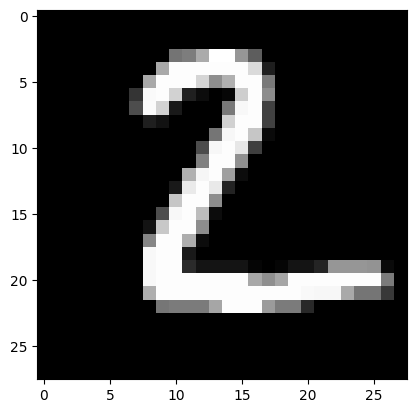

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
 
def loadDataset(fileName, samples):
    x = []
    y = []
    train_data = pd.read_csv(fileName)
    y = np.array(train_data.iloc[0:samples, 0])
    x = np.array(train_data.iloc[0:samples, 1:])
    return x,y
 
x,y=loadDataset("Nmist/mnist_test.csv",100)

print(x.shape)
digit = x[0]
digit_pixels = digit.reshape(28, 28)
plt.imshow(digit_pixels, cmap='gray')
plt.show()